In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
%matplotlib inline


# Practical Time Series Analysis  - Forecasting Individual Household Electric Power Consumption

LESSON 1
BASIC OF TIME SERIES
In this lesson, you will learn about time series, how it allows for the analysis of important patterns that occur, such as trends and seasonality and how it can be used to forecast future values like GDP, unemployment rates, population, mortality rate, global temperatures, pollution levels etc.

# LESSON: 2 Wrangling Time Series Data

Text(0, 0.5, 'Passengers')

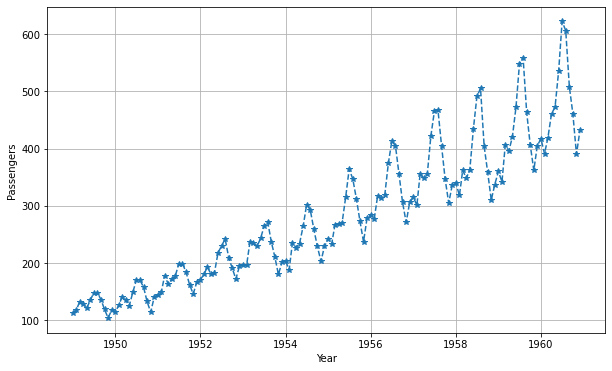

In [19]:

df=pd.read_csv( "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv" ) 
df[ "Month" ] = pd.to_datetime(df[ "Month" ]) #convert column to datetime 
df.set_index( "Month" , inplace= True ) 
plt.figure(figsize=( 10 , 6 )) 
plt.plot(df.index, df.Passengers, '--' , marker= '*' , ) 
plt.grid() 
plt.xlabel( 'Year' ) 
plt.ylabel( 'Passengers' ) 

In [30]:
df=pd.read_csv( "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv" )
df

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [31]:
#check for missing values
df.isnull().values.any()

False

In [ ]:
#There are no missing values in our dataset however, in bid to explain how we handle
#missing values, we will make a copy of our dataset and delete some values at random.

In [32]:
df_copy = df.copy()
rows = df_copy.sample(frac=0.1, random_state=0)
rows['Passengers'] = np.nan
df_copy.loc[rows.index, 'Passengers'] = rows['Passengers']
df_copy.isnull().sum()
#There are now 14 missing values in the dataset

Month          0
Passengers    14
dtype: int64

In [33]:
#Filling missing data by imputation - Forward fill
df_copy_ffill = df_copy.fillna(method='ffill')
df_copy_ffill.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [34]:
#Filling missing data by imputation - Backward fill
df_copy_bfill = df_copy.fillna(method='bfill')
df_copy_bfill.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [35]:
#Filling missing data by interpolation
df_copy_LIF = df_copy.interpolate(method='linear', limit_direction='forward')
df_copy_LIF.isnull().sum()
df_copy_LIB = df_copy.interpolate(method='linear', limit_direction='backward')
df_copy_LIB.isnull().sum()

Month         0
Passengers    0
dtype: int64

# Downsampling and Upsampling

In [40]:
#Downsample to quarterly data points 
df=pd.read_csv( "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv" ) 
df_quarterly = df.resample( '3M' ).mean() 
df_quarterly = pd.to_datetime(df["quarterly"])
df.set_index( "quarterly" , inplace= True ) 
plt.figure(figsize=( 10 , 6 )) 
plt.plot(df.index, df.Passengers, '--' , marker= '*' , ) 
plt.grid() 
plt.xlabel( 'Year' ) 
plt.ylabel( 'Passengers' ) 


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [12]:
#Upsample to daily data points 
df_daily = df.resample( 'D' ).mean() 
df_daily

,Passengers
Month,
1949-01-01,112.0
1949-01-02,NaN
1949-01-03,NaN
1949-01-04,NaN
1949-01-05,NaN
...,...
1960-11-27,NaN
1960-11-28,NaN
1960-11-29,NaN


In [13]:
#Moving average smoothing.py
df_MA = df.copy()
MA = df_MA['Passengers'].rolling(12).mean()

In [14]:
#Time Series Specific Exploratory methods.py

from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(df['Passengers'], model='additive')
decompose_series.plot()
plt.show()

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None